---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.
<br>
*This function should return a numpy array with shape `(4, 100)`*

<IPython.core.display.Javascript object>


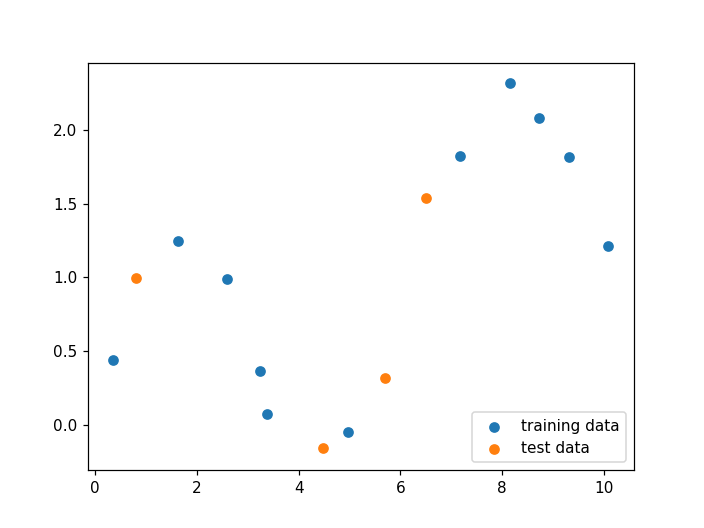

In [234]:
#%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Generate random test data
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

# Reshape the data so that it is in the correct format given the single variable
x = x.reshape(-1,1)
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

#plt.figure()
#plt.scatter(X_train, y_train, label='training data')
#plt.scatter(X_test, y_test, label='test data')
#plt.legend(loc=4);

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [431]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    degrees = [1,3,6,9]
#    y_preds = np.empty((4,100))
    y_preds = []
    interval = np.linspace(0,10,100)
    interval = interval.reshape(-1,1)
    
    for degree in degrees:

        poly = PolynomialFeatures(degree = degree)
        x_poly = poly.fit_transform(X_train)

#        poly2 = PolynomialFeatures(degree = degree)
        interval_poly = poly.fit_transform(interval)

#        X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

        linreg = LinearRegression().fit(x_poly, y_train)
        y_poly_pred = linreg.predict(interval_poly)
        
        y_preds.append(y_poly_pred)
        
    y_preds = np.array(y_preds)
    y_preds = y_preds.reshape(y_preds.shape[:2])
    return y_preds

answer_one()

array([[  2.53040195e-01,   2.69201547e-01,   2.85362899e-01,
          3.01524251e-01,   3.17685603e-01,   3.33846955e-01,
          3.50008306e-01,   3.66169658e-01,   3.82331010e-01,
          3.98492362e-01,   4.14653714e-01,   4.30815066e-01,
          4.46976417e-01,   4.63137769e-01,   4.79299121e-01,
          4.95460473e-01,   5.11621825e-01,   5.27783177e-01,
          5.43944529e-01,   5.60105880e-01,   5.76267232e-01,
          5.92428584e-01,   6.08589936e-01,   6.24751288e-01,
          6.40912640e-01,   6.57073992e-01,   6.73235343e-01,
          6.89396695e-01,   7.05558047e-01,   7.21719399e-01,
          7.37880751e-01,   7.54042103e-01,   7.70203454e-01,
          7.86364806e-01,   8.02526158e-01,   8.18687510e-01,
          8.34848862e-01,   8.51010214e-01,   8.67171566e-01,
          8.83332917e-01,   8.99494269e-01,   9.15655621e-01,
          9.31816973e-01,   9.47978325e-01,   9.64139677e-01,
          9.80301028e-01,   9.96462380e-01,   1.01262373e+00,
        

In [433]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

#plot_one(answer_one())
#plot_one(test)


### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [482]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
    degrees = range(10)
    r2_train = []
    r2_test = []
    
    for degree in degrees:
        poly = PolynomialFeatures(degree = degree)
        x_train_poly = poly.fit_transform(X_train)
        x_test_poly = poly.fit_transform(X_test)
        
        linreg = LinearRegression()
        linreg.fit(x_train_poly,y_train)

#        print("Degree : {}".format(degree))
#        print("x shape : {}".format(x.shape))
#        print("X_train shape : {}".format(X_train.shape))
#        print("X_test shape : {}".format(X_train.shape))        
#        print("x_poly shape : {}".format(x_poly.shape))
#        print("y_train shape : {}".format(y_train.shape))
#        print("y_test shape : {}".format(y_test.shape))
#        print()
        
        y_pred_train = linreg.predict(x_train_poly)
        y_pred_test = linreg.predict(x_test_poly)
        
        r2_train_score = r2_score(y_train,y_pred_train)
        r2_train.append(r2_train_score)
        
        r2_test_score = r2_score(y_test, y_pred_test)
        r2_test.append(r2_test_score)

#    return linreg
    return (np.array(r2_train), np.array(r2_test))

answer_two()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247938, -0.64525379]))

<IPython.core.display.Javascript object>


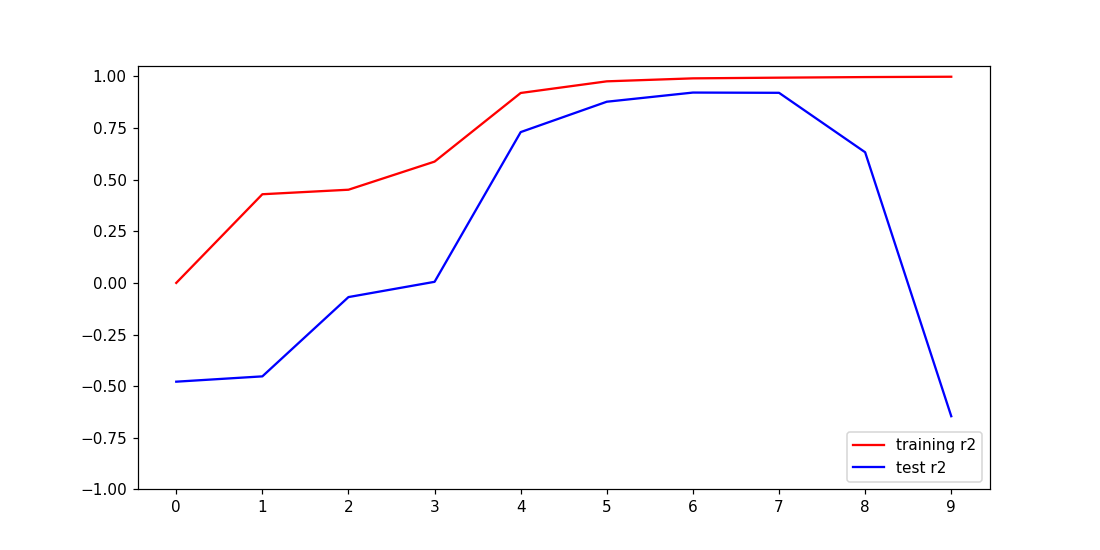

In [462]:
def plot_two(check):
    degrees = range(10)
    plt.figure(figsize=(10,5))
    plt.plot(degrees, check[0], '-r', label='training r2', markersize=10)
    plt.plot(degrees, check[1], '-b', label='test r2', markersize=10)
#    for i,degree in enumerate([1,3,6,9]):
#        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,1.05)
#    plt.xlim([0,10])
    
    plt.xticks(range(10))
    plt.legend(loc=4)

#plot_two(check)

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Note: there may be multiple correct solutions to this question.

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship)

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [483]:
def answer_three():    
    return (0,9,5)

answer_three()

(0, 9, 5)

In [479]:
'''
def answer_three(scores):
    train_r2 = scores[0]
    test_r2 = scores[1]
    underfit = []
    overfit = []
    goodfit = []
#    print("Degrees   r2_Train       r2_Test")
    for i in range(10):
#        print(" {}          {}            {}".format(i, np.round(train[i],3), np.round(test[i],3)))
        if (train_r2[i] < 0.7):
            underfit.append(i)
        elif ((train_r2[i] > 0.7) and (test_r2[i] > .75)):
            goodfit.append(i)
        else:# ((train_r2[i] > 0.7) and (test_r2[i] < .7)):
            overfit.append(i)
            
    ans3 = []
    ans3.extend(underfit)
    ans3.extend(overfit)
    ans3.extend(goodfit)
#    return (underfit,overfit,goodfit)

    return (underfit[0],overfit[2],goodfit[0])

#answer_three(answer_two())
'''

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [443]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    

    # high degree polynomial features: degree 12
    poly = PolynomialFeatures(degree=12)
    x_train_poly = poly.fit_transform(X_train)
    x_test_poly = poly.fit_transform(X_test)
    
    
    # non-regularized LR model
    linreg = LinearRegression()
    linreg.fit(x_train_poly, y_train)
    y_pred_lin = linreg.predict(x_test_poly)
    
    # Lasso LR model: alpah 0.01, max_iter = 10000
    linlasso = Lasso(alpha = 0.01, max_iter = 10000)
    linlasso.fit(x_train_poly, y_train)
    y_pred_lasso = linlasso.predict(x_test_poly)
       
    lin_r2 = r2_score(y_test, y_pred_lin)
    lasso_r2 = r2_score(y_test, y_pred_lasso)
    
#    print("linreg coefs_ {}".format(linreg.coef_))
#    print()
#    print("lasso coefs_ {}".format(linlasso.coef_))
    
    
    return (lin_r2, lasso_r2)
answer_four()

/Users/caboe/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.3119942256528674, 0.84066256147502361)

## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [333]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the following (X_train2, X_test2, y_train2, y_test2) for questions 5 through 7:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

In [340]:
#mush_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [346]:
#mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [343]:
#mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [345]:
#mush_df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [347]:
#mush_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: uint8(119)
memory usage: 944.2 KB


### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*This function should return a list of length 5 containing the feature names in descending order of importance.*

In [385]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train2, y_train2)
    top_5 = sorted(clf.feature_importances_, reverse=True)[:5]
    
    lookup_feature_name = dict(zip(clf.feature_importances_,X_train2.columns))
    top_5_features = [lookup_feature_name[value] for value in top_5]
    
    return top_5_features

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets. 

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return one tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [458]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    gammas = np.logspace(-4,1,6)
    
    clf = SVC(kernel = 'rbf', C=1., random_state=0)
    
#    val_scores = validation_curve(estimator=clf, 
#                                  X=X_mush, 
#                                  y=y_mush, 
#                                  param_name='gamma', 
#                                  param_range=gammas)
    
#    val_scores = validation_curve(estimator=clf, 
#                                  X=X_train2, 
#                                  y=y_train2, 
#                                  param_name='gamma', 
#                                  param_range=gammas)
    
    val_scores = validation_curve(estimator=clf, 
                                  X=X_test2, 
                                  y=y_test2, 
                                  param_name='gamma', 
                                  param_range=gammas)
    
    train_scores = val_scores[0]
    test_scores = val_scores[1]
    
    train_means = []
    test_means = []
    
    for i in range(val_scores[0].shape[0]):
        train_mean = np.mean(train_scores[i])
        train_means.append(train_mean)

        test_mean = np.mean(test_scores[i])
        test_means.append(test_mean)
    
    train_ans = np.array(train_means).reshape(6,)
    test_ans = np.array(test_means).reshape(6,)
        
    return (train_ans, test_ans)
answer_six()

(array([ 0.56647847,  0.93155951,  0.99039881,  1.        ,  1.        ,  1.        ]),
 array([ 0.56768547,  0.92959558,  0.98965952,  1.        ,  0.99507994,
         0.52240279]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? Note: there may be multiple correct solutions to this question.

(Hint: Try plotting the scores from question 6 to visualize the relationship)

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [445]:
def plot_six(check):
    gammas = range(6)#np.logspace(-4,1,6)
    plt.figure(figsize=(10,5))
    plt.plot(gammas, check[0], '-r', label='training r2', markersize=10)
    plt.plot(gammas, check[1], '-b', label='test r2', markersize=10)
#    for i,degree in enumerate([1,3,6,9]):
#        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,1.05)
#    plt.xlim([0,10])
    plt.xticks(range(7))
    plt.legend(loc=4)

#plot_six(check6)

In [446]:
#train_error = check6[0]
#test_error = check6[1]
#print("TRAIN TEST")
#for i in range(6):
#    print(np.round(train_error[i],3), np.round(test_error[i],3))

In [485]:
'''
def answer_seven(scores):
    train_r2 = scores[0]
    test_r2 = scores[1]
    underfit = []
    overfit = []
    goodfit = []
    gammas = np.logspace(-4,1,6)
    #    print("Degrees   r2_Train       r2_Test")
    for i in range(len(train_r2)):
        if (train_r2[i] < 0.7):
            underfit.append(gammas[i])
        elif ((train_r2[i] > 0.7) and (test_r2[i] > .7)):
            goodfit.append(gammas[i])
        elif ((train_r2[i] > 0.7) and (test_r2[i] < .7)):
            overfit.append(gammas[i])
    return (underfit[0],overfit[0],goodfit[0])
answer_seven(answer_six())
'''

(0.0001, 10.0, 0.001)

In [495]:
def answer_seven():
    gammas = np.logspace(-4,1,6)
    return(gammas[0], gammas[5], gammas[1])
answer_seven()

(0.0001, 10.0, 0.001)